# Business Understanding
Hacer un portafolio de inversión requiere de revisar las metodologías existentes. Para este ejercicio mostraré 2 metodologías, el modelo de Markowitz y el modelo Kelly Criterion. Si me dio tiempo, estaría mostrando el modelo CAPM.

# Data Aquisition and Understanding
¿Alguna vez has visitado Yahoo Finance? Es un lugar obligado para obtener datos de stocks!. Y los datos pueden ser consumidos usando Python.

In [1]:
!pip install yfinance

In [2]:
!pip install forex_python

In [3]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from forex_python.converter import CurrencyRates
from datetime import datetime

Vamos a mantenerlo sencillo. Necesitamos los precios de cierre de los stocks, y por supuesto, unos stocks! Si buscas rápido en [https://bing.com](bing.com) por el texto "***top stocks june 2024***" encontrarás entradas interesantes como esta [https://www.forbes.com/advisor/investing/best-stocks-to-buy-now/].

Ahora, vamos a traer los datos de los stocks a unos data frames. Vamos a practicar Python e inglés al mismo tiempo! 

In [4]:
portfolio = ['CRWD', 'PLTR', 'EQT', 'AVGO', 'UBER', 'CRM', 'MNDY', 'MSFT', 'NVDA']

In [5]:
stock_prices = pd.DataFrame()
stock_returns = pd.DataFrame()
stock_adjclose = pd.DataFrame()
mcaps = {}

# Get today's date
today_date = datetime.now()
# Convert the date to a string
end = today_date.strftime('%Y-%m-%d')

# For each stock in the portfolio, it adds the closure value and calculates the returns percentage (+/-)
for x in portfolio:
    stock = yf.Ticker(x)
    close_price = stock.history(start='2022-01-01', end=end)['Close']
    mcaps[x] = stock.info["marketCap"]

    # Concats each stock as a new column
    stock_prices = pd.concat([stock_prices, close_price], axis=1)

    # Calculates percent return compared with the previous close and adds it as a new column for each stock
    stock_returns = pd.concat([stock_returns, close_price.pct_change()], axis=1)

# Each column has the stock name
stock_prices.columns = portfolio
stock_returns.columns = portfolio

# Lets drop NAs
stock_prices = stock_prices.dropna()
stock_returns = stock_returns.dropna()

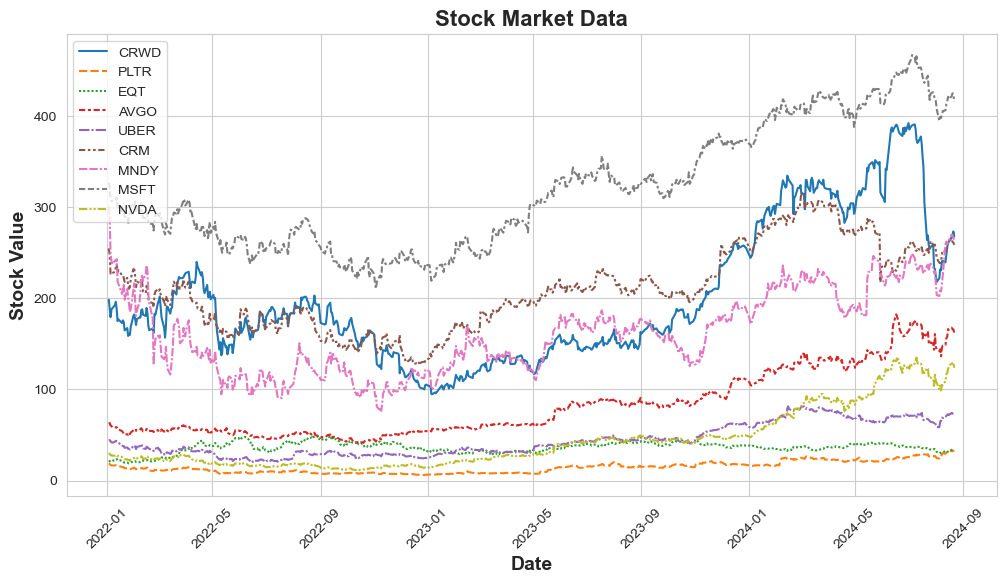

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))  # Width, height in inches

# Set the style of seaborn for a cleaner look
sns.set_style('whitegrid')

# Plot using seaborn with more readable formatting
sns.lineplot(data=stock_prices)

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate date labels
plt.xlabel('Date', fontsize=14, fontweight='bold')  # Bolder and larger x-axis label
plt.ylabel('Stock Value', fontsize=14, fontweight='bold')  # Bolder and larger y-axis label
plt.title('Stock Market Data', fontsize=16, fontweight='bold')  # Bolder and larger title

# Show the plot
plt.show()

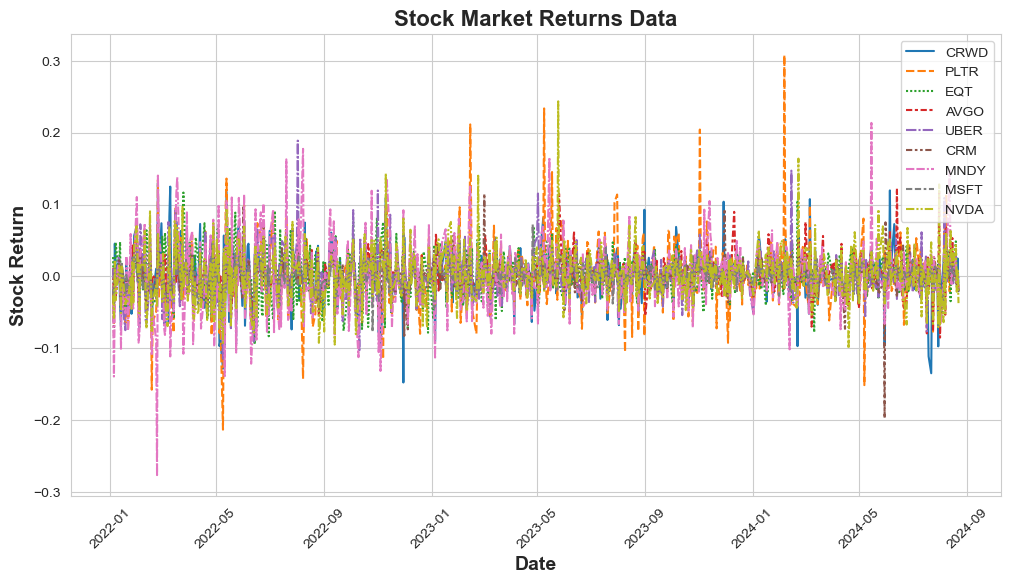

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))  # Width, height in inches

# Set the style of seaborn for a cleaner look
sns.set_style('whitegrid')

# Plot using seaborn with more readable formatting
sns.lineplot(data=stock_returns)

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate date labels
plt.xlabel('Date', fontsize=14, fontweight='bold')  # Bolder and larger x-axis label
plt.ylabel('Stock Return', fontsize=14, fontweight='bold')  # Bolder and larger y-axis label
plt.title('Stock Market Returns Data', fontsize=16, fontweight='bold')  # Bolder and larger title

# Show the plot
plt.show()

In [8]:
expected_stock_returns = []
individual_stock_risk = []

for x, y in stock_returns.items():
    # Mean of returns for each stock
    expected_stock_returns.append(y.mean())

    # Std. Dev. of returns for each stock
    individual_stock_risk.append(y.std())

In [9]:
print(f"Mean return (percent)")

for name, value in zip(stock_prices, expected_stock_returns):
    print(f"\t{name}: \t{value * 100}")

Mean return (percent)
	CRWD: 	0.10374538157646421
	PLTR: 	0.17617643500301333
	EQT: 	0.10946047422536204
	AVGO: 	0.17354754576318945
	UBER: 	0.12526970154485922
	CRM: 	0.032961909296004836
	MNDY: 	0.08632816281677169
	MSFT: 	0.052265074404014344
	NVDA: 	0.27654789957953835


In [10]:
print(f"Risk (Std. Dev)")

for name, value in zip(stock_prices, individual_stock_risk):
    print(f"\t{name}: \t ±{value}")


Risk (Std. Dev)
	CRWD: 	 ±0.034110826858091976
	PLTR: 	 ±0.043808510401081566
	EQT: 	 ±0.02845818784258
	AVGO: 	 ±0.024198628088629583
	UBER: 	 ±0.03116134948105252
	CRM: 	 ±0.024656787278408324
	MNDY: 	 ±0.0462633209735161
	MSFT: 	 ±0.01792653927595332
	NVDA: 	 ±0.03571900439799207


In [11]:
# Vectorization
expected_stock_returns = np.array(pd.DataFrame(expected_stock_returns))

# Vectorization
individual_stock_risk = np.array(pd.DataFrame(individual_stock_risk))

# Covariance matrix of "Percent change per stock"
stock_returns_cov_matrix = np.array(stock_returns.cov())

In [12]:
stock_returns_cov_matrix

array([[1.16354851e-03, 8.24267033e-04, 1.53542720e-04, 3.61299529e-04,
        5.07973737e-04, 4.70388787e-04, 8.80504395e-04, 3.17568923e-04,
        6.29886839e-04],
       [8.24267033e-04, 1.91918558e-03, 2.23279583e-04, 4.42461888e-04,
        7.16560187e-04, 4.93277120e-04, 1.07782356e-03, 3.62044829e-04,
        8.03759934e-04],
       [1.53542720e-04, 2.23279583e-04, 8.09868455e-04, 1.42347541e-04,
        1.35953119e-04, 1.58857531e-04, 1.46827541e-04, 9.43282948e-05,
        2.11295366e-04],
       [3.61299529e-04, 4.42461888e-04, 1.42347541e-04, 5.85573601e-04,
        2.95713443e-04, 2.75708415e-04, 4.34009931e-04, 2.42590276e-04,
        6.10210924e-04],
       [5.07973737e-04, 7.16560187e-04, 1.35953119e-04, 2.95713443e-04,
        9.71029701e-04, 3.85078053e-04, 7.28223900e-04, 2.43367609e-04,
        5.41250845e-04],
       [4.70388787e-04, 4.93277120e-04, 1.58857531e-04, 2.75708415e-04,
        3.85078053e-04, 6.07957159e-04, 6.40476162e-04, 2.68276253e-04,
        4.5

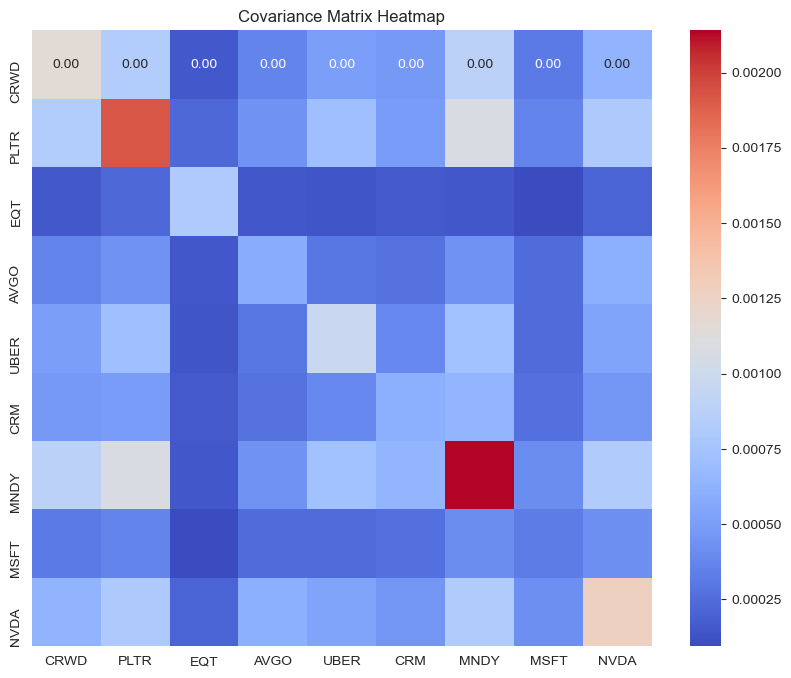

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stock_returns' is your DataFrame with stock return data
# Calculate the covariance matrix using Pandas
cov_matrix_df = stock_returns.cov()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(cov_matrix_df, annot=True, fmt='.2f', cmap='coolwarm')

# Add title
plt.title('Covariance Matrix Heatmap')

# Show the plot
plt.show()

In [14]:
cov_matrix_df

,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
CRWD,0.001164,0.000824,0.000154,0.000361,0.000508,0.000470,0.000881,0.000318,0.000630
PLTR,0.000824,0.001919,0.000223,0.000442,0.000717,0.000493,0.001078,0.000362,0.000804
EQT,0.000154,0.000223,0.000810,0.000142,0.000136,0.000159,0.000147,0.000094,0.000211
AVGO,0.000361,0.000442,0.000142,0.000586,0.000296,0.000276,0.000434,0.000243,0.000610
UBER,0.000508,0.000717,0.000136,0.000296,0.000971,0.000385,0.000728,0.000243,0.000541
CRM,0.000470,0.000493,0.000159,0.000276,0.000385,0.000608,0.000640,0.000268,0.000459
MNDY,0.000881,0.001078,0.000147,0.000434,0.000728,0.000640,0.002140,0.000411,0.000821
MSFT,0.000318,0.000362,0.000094,0.000243,0.000243,0.000268,0.000411,0.000321,0.000416
NVDA,0.000630,0.000804,0.000211,0.000610,0.000541,0.000459,0.000821,0.000416,0.001276


¿Y qué buscamos?. ¿Crecimiento en tandem o independencia entre stocks?. Es una pregunta difícil, quizá estén cómodos con un mix. Es decir, que stocks con alto retorno se relacione con otros, esto trae mayor riesgo pero ahí pueden estar las ganancias. Por supuesto queremos evitar stocks con covarianza negativa. Quizá también queremos tener stocks cuya correlación es cerca a 0 y que presentan un alto retorno, !grandes ganancias y mejor diversificación¡
No es una tarea fácil. Aquí es donde aplicar el modelo de Markowitz será de utilidad.

**Nota**: Sólo se consideraron datos desde 2021-01-01. ¿Cuál es el motivo?. Qué las restricciones de la pandemia se relajaron en este punto y el comportamiento de los mercados tiene una tendencia más clara desde ese día.

# Modeling
Para automatizar la toma de decisiones tendremos que usar alguna librería que realice la optimización. Dicha optimización minimizará la volatilidad a partir de la covarianza maximizando los retornos. Usaremos `PyPortfolioOpt`.

## Modelo de Markowitz
Este modelo es un clásico dentro de la teoría de optimización de portafolios. Se basa en la premisa de que los retornos (en mi caso, retornos de stocks) vienen de una distribución normal. Muchos papers nos han dejado ver que en realidad en las colas tenemos eventos que no son para nada raros y que, por lo mismo, no cumplen las características de la distribución normal.

Aún así, es un buen punto inicial. ¿Acaso la regresión no genera los primeros modelos base que usamos luego para comparación con modelos más elaborados?. 

Según Kanungo, D. K.(2023), el propio Harry Markowitz (finado en 2023) no usaba su propio modelo. Por dicho modelo fue merecedor de el **John von Neumann Theory Prize** en 1989 y el premio **Nobel** en 1990.

In [15]:
!pip install pyportfolioopt

In [16]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(expected_stock_returns, stock_returns_cov_matrix, weight_bounds=(0,1))

In [17]:
?ef

Type:           EfficientFrontier
String form:    <pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier object at 0x000001CA0398A1D0>
File:           c:\users\imedi\anaconda3\envs\datapub202406\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py
Docstring:     
An EfficientFrontier object (inheriting from BaseConvexOptimizer) contains multiple
optimization methods that can be called (corresponding to different objective
functions) with various parameters. Note: a new EfficientFrontier object should
be instantiated if you want to make any change to objectives/constraints/bounds/parameters.

Instance variables:

- Inputs:

    - ``n_assets`` - int
    - ``tickers`` - str list
    - ``bounds`` - float tuple OR (float tuple) list
    - ``cov_matrix`` - np.ndarray
    - ``expected_returns`` - np.ndarray
    - ``solver`` - str
    - ``solver_options`` - {str: str} dict

- Output: ``weights`` - np.ndarray

Public methods:

- ``min_volatility()`` optimizes for minimum

In [18]:
ratios_min_volatility = ef.min_volatility()

In [19]:
cleaned_ratios = pd.Series(ratios_min_volatility)
cleaned_ratios.index = portfolio

cleaned_ratios

CRWD    0.000000
PLTR    0.000000
EQT     0.218471
AVGO    0.102825
UBER    0.041168
CRM     0.026749
MNDY    0.000000
MSFT    0.610786
NVDA    0.000000
dtype: float64

In [20]:
optimal_portfolio = np.expand_dims(cleaned_ratios, axis=0)
optimal_portfolio

array([[0.        , 0.        , 0.21847098, 0.10282528, 0.04116828,
        0.02674921, 0.        , 0.61078625, 0.        ]])

In [21]:
# Expected return with the optimal solution
opt_portfolio_expected_return = np.matmul(optimal_portfolio, expected_stock_returns)
opt_portfolio_expected_return

array([[0.00079721]])

In [22]:
# Std. Dev. for the optimal solution
opt_portfolio_var = np.matmul(optimal_portfolio, \
                          np.matmul(stock_returns_cov_matrix, optimal_portfolio.transpose()))
opt_portfolio_var

array([[0.00025903]])

In [23]:
opt_portfolio_risk = math.sqrt(opt_portfolio_var)
opt_portfolio_risk

C:\Users\imedi\AppData\Local\Temp\ipykernel_83896\3615998991.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  opt_portfolio_risk = math.sqrt(opt_portfolio_var)


0.016094420651312127

In [24]:
mxn_investment_amount = 23000.00
mxn_to_usd_exchange_rate = 17.70

In [25]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

# Final report:
print(f'Optimal Markowitz Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {opt_portfolio_expected_return[0][0]*100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*opt_portfolio_expected_return[0][0]*52*5:.2f}')
print(f'   -Variance: +/-{opt_portfolio_var[0][0]*100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*opt_portfolio_var[0][0]*52*5:.2f}')
print(f'   -Risk: {opt_portfolio_risk*100:.2f}%')
print('   -Portfolio composition:')
for symbol, percentage in cleaned_ratios.sort_values(ascending= False).items():
    print(f'\tStock: {symbol}. \tPercentage: {percentage*100:.2f}%.\tAmount: ${percentage * usd_investment_amount:.2f}.')


Optimal Markowitz Portfolio (MXN amount: 23000.0. USD amount: 1299.4350282485875):
   -Expected earns (daily): 0.08%.
	Expected amount (Yearly): $269.34
   -Variance: +/-0.03%
	Expected variance amount (Yearly): +/-$87.51
   -Risk: 1.61%
   -Portfolio composition:
	Stock: MSFT. 	Percentage: 61.08%.	Amount: $793.68.
	Stock: EQT. 	Percentage: 21.85%.	Amount: $283.89.
	Stock: AVGO. 	Percentage: 10.28%.	Amount: $133.61.
	Stock: UBER. 	Percentage: 4.12%.	Amount: $53.50.
	Stock: CRM. 	Percentage: 2.67%.	Amount: $34.76.
	Stock: CRWD. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: PLTR. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: MNDY. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: NVDA. 	Percentage: 0.00%.	Amount: $0.00.


## Modelo Kelly Criterion

Este modelo, también llamado "algoritmo de de crecimiento óptimo de capital" fue publicado en 1956 por John Kelly. Su efectividad está mas bien en el corto plazo minimizando la ruina financiera. Este modelo sobre simplifíca los mercados.

In [26]:
stock_prices

,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
2022-01-03 00:00:00-05:00,198.330002,18.530001,20.830160,62.370541,43.950001,254.730225,301.209991,326.940796,30.075630
2022-01-04 00:00:00-05:00,189.190002,18.170000,21.393398,63.085152,44.419998,247.520859,289.260010,321.334778,29.245886
2022-01-05 00:00:00-05:00,179.289993,16.959999,20.706062,60.459896,43.240002,227.019608,249.000000,308.999390,27.562422
2022-01-06 00:00:00-05:00,187.490005,16.740000,20.791977,59.898552,42.029999,228.495377,241.100006,306.557678,28.135557
2022-01-07 00:00:00-05:00,188.990005,16.559999,21.775251,58.217331,41.509998,227.657776,237.380005,306.713989,27.205961
...,...,...,...,...,...,...,...,...,...
2024-08-16 00:00:00-04:00,262.540009,32.080002,32.150002,165.720001,72.040001,262.910004,263.380005,418.470001,124.580002
2024-08-19 00:00:00-04:00,266.779999,32.500000,33.720001,167.710007,74.180000,265.380005,270.000000,421.529999,130.000000
2024-08-20 00:00:00-04:00,266.529999,32.320000,33.240002,165.949997,73.309998,261.839996,268.690002,424.799988,127.250000
2024-08-21 00:00:00-04:00,273.209991,32.540001,33.099998,165.779999,73.480003,261.089996,266.500000,424.140015,128.500000


In [27]:
!pip install pyomo

Es necesario instalar el solver `ipopt`. En un Linux esto se haría con los siguientes comandos.

!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip" \
!mv ipopt-linux64.zip ../ipopt \
!ls ../ipopt \
cd stock_portfolio_optimization/ \
cd ipopt/ \
unzip -o -q ipopt-linux64 \
ls

En Windows. Descarguen el folder https://www.coin-or.org/download/binary/Ipopt/ y copie el contenido del zip póngalo en la carpeta ipopt.

In [28]:
from pyomo.environ import *

In [29]:
## It is convenient to change the the stock_price dataframe for further processing. A multilevel column hierarchy is the first step to execute
stock_prices.columns = [list(stock_prices.columns), ['Close'] * len(stock_prices.columns)]
stock_prices.columns.names = ['Ticker', 'Price']

In [30]:
stock_prices.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,Close,Close,Close,Close,Close,Close,Close,Close,Close
2022-01-03 00:00:00-05:00,198.330002,18.530001,20.830160,62.370541,43.950001,254.730225,301.209991,326.940796,30.075630
2022-01-04 00:00:00-05:00,189.190002,18.170000,21.393398,63.085152,44.419998,247.520859,289.260010,321.334778,29.245886
2022-01-05 00:00:00-05:00,179.289993,16.959999,20.706062,60.459896,43.240002,227.019608,249.000000,308.999390,27.562422
2022-01-06 00:00:00-05:00,187.490005,16.740000,20.791977,59.898552,42.029999,228.495377,241.100006,306.557678,28.135557
2022-01-07 00:00:00-05:00,188.990005,16.559999,21.775251,58.217331,41.509998,227.657776,237.380005,306.713989,27.205961


In [31]:
## Lets calculate the percentage difference for every close
returns = stock_prices.loc[:, (slice(None), 'Close')] / stock_prices.loc[:, (slice(None), 'Close')].shift(1)
returns = returns.rename(columns={'Close': 'returns'})

In [32]:
returns.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,returns,returns,returns,returns,returns,returns,returns,returns,returns
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,0.953915,0.980572,1.027040,1.011458,1.010694,0.971698,0.960327,0.982853,0.972411
2022-01-05 00:00:00-05:00,0.947672,0.933407,0.967872,0.958386,0.973435,0.917174,0.860817,0.961612,0.942438
2022-01-06 00:00:00-05:00,1.045736,0.987028,1.004149,0.990715,0.972017,1.006501,0.968273,0.992098,1.020794
2022-01-07 00:00:00-05:00,1.008000,0.989247,1.047291,0.971932,0.987628,0.996334,0.984571,1.000510,0.966960


In [33]:
lookback = 52 * 5 ## 52 weeks a year, 5 days a week

In [34]:
## This will calculate the rolling means for a year cycle
means = returns.rolling(lookback).mean().rename(columns={'returns': 'mean'})

In [35]:
means.tail()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,mean,mean,mean,mean,mean,mean,mean,mean,mean
2024-08-16 00:00:00-04:00,1.002563,1.002970,0.999269,1.002858,1.002058,1.001031,1.002391,1.001055,1.004444
2024-08-19 00:00:00-04:00,1.002613,1.003065,0.999424,1.002837,1.002194,1.001041,1.002441,1.001055,1.004547
2024-08-20 00:00:00-04:00,1.002739,1.003246,0.999286,1.002856,1.002130,1.001069,1.002622,1.001132,1.004530
2024-08-21 00:00:00-04:00,1.002846,1.003677,0.999168,1.002993,1.002229,1.001162,1.002641,1.001172,1.004749
2024-08-22 00:00:00-04:00,1.002704,1.003563,0.999254,1.002949,1.002177,1.001080,1.002509,1.001085,1.004622


In [36]:
## This will calculate the rolling variance for a year cycle
var = returns.rolling(lookback).var().rename(columns={'returns': 'var'})

In [37]:
var.tail()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,var,var,var,var,var,var,var,var,var
2024-08-16 00:00:00-04:00,0.000838,0.001648,0.000397,0.000732,0.000538,0.000457,0.001024,0.000156,0.000999
2024-08-19 00:00:00-04:00,0.000839,0.001648,0.000407,0.000731,0.000541,0.000458,0.001026,0.000156,0.001004
2024-08-20 00:00:00-04:00,0.000834,0.001636,0.000405,0.000730,0.000542,0.000456,0.001015,0.000155,0.001005
2024-08-21 00:00:00-04:00,0.000835,0.001591,0.000402,0.000724,0.000539,0.000453,0.001014,0.000154,0.000995
2024-08-22 00:00:00-04:00,0.000837,0.001593,0.000400,0.000726,0.000539,0.000453,0.001014,0.000156,0.001001


In [38]:
## Lets merge the dataframes together
df = pd.concat([returns, means, var], axis=1)
## Get covariance matrices and transform to 3D array
df.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA,CRWD,...,NVDA,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,returns,returns,returns,returns,returns,returns,returns,returns,returns,mean,...,mean,var,var,var,var,var,var,var,var,var
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,0.953915,0.980572,1.027040,1.011458,1.010694,0.971698,0.960327,0.982853,0.972411,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05 00:00:00-05:00,0.947672,0.933407,0.967872,0.958386,0.973435,0.917174,0.860817,0.961612,0.942438,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06 00:00:00-05:00,1.045736,0.987028,1.004149,0.990715,0.972017,1.006501,0.968273,0.992098,1.020794,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07 00:00:00-05:00,1.008000,0.989247,1.047291,0.971932,0.987628,0.996334,0.984571,1.000510,0.966960,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
n = returns.shape[1]
n

9

In [40]:
## Lets drop the "Close" level for the returns for further processing 
cov = returns.droplevel(1, axis=1)

In [41]:
cov.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,0.953915,0.980572,1.027040,1.011458,1.010694,0.971698,0.960327,0.982853,0.972411
2022-01-05 00:00:00-05:00,0.947672,0.933407,0.967872,0.958386,0.973435,0.917174,0.860817,0.961612,0.942438
2022-01-06 00:00:00-05:00,1.045736,0.987028,1.004149,0.990715,0.972017,1.006501,0.968273,0.992098,1.020794
2022-01-07 00:00:00-05:00,1.008000,0.989247,1.047291,0.971932,0.987628,0.996334,0.984571,1.000510,0.966960


In [42]:
## Now, lets calculate the covarience each day for all stocks
cov = cov.rolling(lookback).cov()

In [43]:
cov.tail()

Ticker                                CRWD      PLTR       EQT      AVGO  \
                          Ticker                                           
2024-08-22 00:00:00-04:00 UBER    0.000243  0.000359  0.000035  0.000219   
                          CRM     0.000263  0.000205  0.000025  0.000167   
                          MNDY    0.000361  0.000374  0.000047  0.000291   
                          MSFT    0.000164  0.000179  0.000004  0.000151   
                          NVDA    0.000384  0.000388  0.000033  0.000585   

Ticker                                UBER       CRM      MNDY      MSFT  \
                          Ticker                                           
2024-08-22 00:00:00-04:00 UBER    0.000539  0.000175  0.000294  0.000104   
                          CRM     0.000175  0.000453  0.000290  0.000116   
                          MNDY    0.000294  0.000290  0.001014  0.000146   
                          MSFT    0.000104  0.000116  0.000146  0.000156   
                          NVDA    0.000263  0.000193  0.000342  0.000183   

Ticker                                NVDA  
                          Ticker            
2024-08-22 00:00:00-04:00 UBER    0.000263  
                          CRM     0.000193  
                          MNDY    0.000342  
                          MSFT    0.000183  
                          NVDA    0.001001

In [44]:
## Lets convert this dataframe to a list of lists for further processing
cov = cov.values
cov = cov.reshape(-1, n, n)

In [45]:
print(cov)

[[[            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  ...
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]]

 [[            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  ...
  [            nan     

In [46]:
fracs = np.zeros((df.shape[0], n))

In [47]:
fracs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
fracs[:] = np.nan

In [49]:
fracs

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [50]:
g = np.zeros(df.shape[0])
g[:] = np.nan

In [51]:
g

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

### La implementación de un modelo de optimización por *Kelly fraction*
No hay que inventar el hilo negro. Cuando busqué una implementación me encontré un gran trabajo en Raposa (2022), el cual debería leer para tener más detalles. En dicho sitio se describe la función **Kelly fraction** y su conveniencia para la optimización en problemas de valores continuos. Nótese que de igual forma, se asume normalidad en los datos que modelan la función.

In [52]:
## Te function requires the means vector, the covariance matrix and the return free-risk. This RFR can be CETE, what you think about them?
def buildKCOptModel(returns: np.array, varcov: np.matrix, 
                    rfr: float = 0):
    assert returns.shape[0] == varcov.shape[0]
    assert returns.shape[0] == varcov.shape[1]
    
    m = ConcreteModel()
    
    # Indices. Yes, this is to iterate the i-th element 
    m.i = RangeSet(0, returns.shape[0] - 1)
    
    # Decision variables. Yes, this will be useful later to set the constraint for $f_i \le 1$
    m.f = Var(m.i, domain=UnitInterval)
    
    # Parameters
    ## This is \mu
    m.mu = Param(m.i, 
               initialize={i: m for i, m in zip(m.i, returns)})
    ## This is \sigma
    m.sigma = Param(m.i, m.i, 
                  initialize={(i, j): varcov[i, j] 
                              for i in m.i 
                              for j in m.i})
    
    # Constraints
    ## This is \sum_{i=1}^n{f_i} \le 1}
    @m.Constraint()
    def fullyInvestedConstraint(m):
        return sum(m.f[i] for i in m.i) == 1
    
    # Objective
    ## This is the huge formula, yes, that large one.
    @m.Objective(sense=maximize)
    def objective(m):
        return (rfr + sum(m.f[i] * (m.mu[i] - rfr) for i in m.i) - \
            sum(
                sum(m.f[i] * m.sigma[i, j] * m.f[j] for j in m.i)
            for i in m.i) / 2)
    
    return m

In [53]:
## Lets calculate the means and the variances for every single day after the lookback
rfr = 0 ## Assuming no CETES.

## Lets calculate the optimized f for each day from the lookback
for i, (ts, row) in enumerate(df.iterrows()):
    if i < lookback:
        continue
        
    means = row.loc[(slice(None), 'mean')].values
    var = row.loc[(slice(None), 'var')].values

    varcov = cov[i]
    ## The covariance for each stock is the variance on its diagonal
    np.fill_diagonal(varcov, var)

    ## Kelly criterion is built on top of an optimization model. Dig into the model function. 
    model = buildKCOptModel(means, varcov, rfr)
    ## Lets maximize the returns
    results = SolverFactory('../ipopt/bin/ipopt.exe').solve(model)

    ## The optimal fractions colected for f function 
    fracs[i] = np.array([model.f[j].value for j in model.f])

    ## The expected growth rate after model optimization
    g[i] = model.objective.expr()
    
df_fracs = pd.DataFrame(fracs, columns=returns.columns, 
                      index=returns.index).rename(
                          columns={'returns': 'fraction'})
df_g = pd.DataFrame(g, index=returns.index)
df_g.columns = pd.MultiIndex.from_arrays(
  [['g'], ['g']])

optimized_portfolio = pd.concat([returns, df, df_fracs, df_g], axis=1)

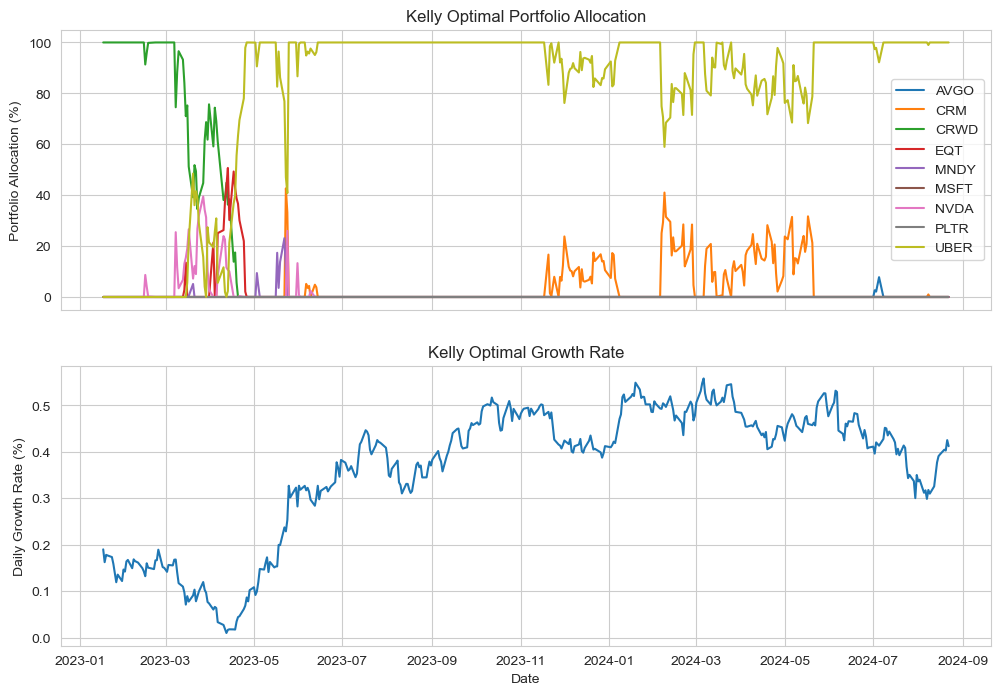

In [54]:
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

ax[0].plot(optimized_portfolio.loc[:, (slice(None), 'fraction')] * 100)
ax[0].set_ylabel('Portfolio Allocation (%)')
ax[0].set_title('Kelly Optimal Portfolio Allocation')
labels = [i for i in list(optimized_portfolio.columns.levels[0]) if i in portfolio]
ax[0].legend(labels=labels)

ax[1].plot((optimized_portfolio.loc[:, 'g'] - 1) * 100)

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Growth Rate (%)')
ax[1].set_title('Kelly Optimal Growth Rate')

plt.show()

In [55]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

mean_kelly =  (optimized_portfolio.loc[:, 'g'] - 1).mean()['g'] 
stdev_kelly =  (optimized_portfolio.loc[:, 'g'] - 1).std()['g']
df_portfolio = optimized_portfolio.loc[:, (slice(None), 'fraction')]

# Final report:
print(f'Kelly Criterion Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {mean_kelly * 100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*mean_kelly*52*5:.2f}')
print(f'   -Variance: +/-{stdev_kelly * 100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*stdev_kelly*52*5:.2f}')
print('   -Portfolio composition:')
for symbol, percentage in df_portfolio.mean().sort_values(ascending= False).items():
    print(f'\tStock: {symbol[0]}. \tPercentage: {percentage*100:.2f}%.\tAmount: ${percentage * usd_investment_amount:.2f}.')

Kelly Criterion Portfolio (MXN amount: 23000.0. USD amount: 1299.4350282485875):
   -Expected earns (daily): 0.36%.
	Expected amount (Yearly): $1226.74
   -Variance: +/-0.14%
	Expected variance amount (Yearly): +/-$483.40
   -Portfolio composition:
	Stock: NVDA. 	Percentage: 80.83%.	Amount: $1050.31.
	Stock: EQT. 	Percentage: 12.77%.	Amount: $165.88.
	Stock: PLTR. 	Percentage: 3.82%.	Amount: $49.61.
	Stock: AVGO. 	Percentage: 1.17%.	Amount: $15.24.
	Stock: MNDY. 	Percentage: 1.17%.	Amount: $15.15.
	Stock: UBER. 	Percentage: 0.22%.	Amount: $2.83.
	Stock: CRWD. 	Percentage: 0.03%.	Amount: $0.41.
	Stock: MSFT. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: CRM. 	Percentage: 0.00%.	Amount: $0.00.


## Modelo Black-Litterman
TO-DO from https://colab.research.google.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb#scrollTo=fo6SKTGAAbNn

In [56]:
market_prices = yf.download("SPY", period="max")["Adj Close"]
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
1993-01-29    24.684118
1993-02-01    24.859661
1993-02-02    24.912348
1993-02-03    25.175676
1993-02-04    25.281006
Name: Adj Close, dtype: float64

In [57]:
!pip install scikit-learn

### Troubleshooting
Modified C:\Users\imedi\anaconda3\envs\DataPub202406\Lib\site-packages\pypfopt\plotting.py accordingly to https://github.com/robertmartin8/PyPortfolioOpt/issues/562

In [58]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(stock_prices)

The shrunk Ledoit-Wolf covariance matrix is a powerful tool in portfolio optimization.

1. **Background**:
  * In portfolio optimization, we aim to construct an efficient portfolio by selecting the right mix of assets.
  * Two critical components are:
    * **Expected returns**: Represent the portfolio manager’s ability to forecast future price movements.
    * **Covariance matrix of stock returns**: Represents risk control.
2. **The Problem with Sample Covariance Matrix**:
  * Traditionally, we estimate the covariance matrix using historical stock returns.
  * However, this approach has limitations:
    * **Estimation error**: When the number of stocks is large relative to the available historical data, the sample covariance matrix is estimated with significant error.
    * Extreme coefficients in the matrix are unreliable due to this estimation error.
3. **Shrinkage Transformation**:
  * Instead of using the raw sample covariance matrix, we apply a transformation called shrinkage.
  * Shrinkage pulls extreme coefficients toward more central values, reducing estimation error where it matters most.
  * The goal is to strike a balance between using the sample covariance matrix and improving its reliability.
4. **Benefits of Shrinkage**:
  * **Reduced tracking error**: Shrinkage reduces tracking error relative to a benchmark index.
  * **Increased information ratio**: It substantially improves the realized information ratio of the active portfolio manager1.

In [59]:
S = S.ledoit_wolf()
S.columns = S.columns.droplevel(1)
S.columns.name = None
S.index = S.index.droplevel(1)
S.index.name = None

In [60]:
S

,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
CRWD,0.292485,0.204263,0.038050,0.089534,0.125882,0.116568,0.218199,0.078697,0.156093
PLTR,0.204263,0.479741,0.055331,0.109647,0.177572,0.122240,0.267097,0.089719,0.199181
EQT,0.038050,0.055331,0.204839,0.035275,0.033691,0.039367,0.036386,0.023376,0.052361
AVGO,0.089534,0.109647,0.035275,0.149256,0.073281,0.068324,0.107553,0.060117,0.151217
UBER,0.125882,0.177572,0.033691,0.073281,0.244776,0.095427,0.180462,0.060309,0.134128
CRM,0.116568,0.122240,0.039367,0.068324,0.095427,0.154803,0.158718,0.066482,0.113655
MNDY,0.218199,0.267097,0.036386,0.107553,0.180462,0.158718,0.534534,0.101763,0.203538
MSFT,0.078697,0.089719,0.023376,0.060117,0.060309,0.066482,0.101763,0.083781,0.103178
NVDA,0.156093,0.199181,0.052361,0.151217,0.134128,0.113655,0.203538,0.103178,0.320314


Calculate the market-implied risk-aversion parameter (i.e market price of risk) based on market prices. The rick free rate is 0.02. For example, if the market has excess returns of 10% a year with 5% variance, the risk-aversion parameter is 2, i.e you have to be compensated 2x the variance.

In [61]:
(market_prices.pct_change().dropna().mean() * 252), (market_prices.pct_change().dropna().mean() * 252) - 0.02 , (market_prices.pct_change().dropna().var() * 252) ## 252 days

(0.11622915997563525, 0.09622915997563525, 0.034836205313965855)

In [62]:
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

2.762331864459902

Mean returns minus the risk free rate are 2.7 times the variance.

<Axes: >

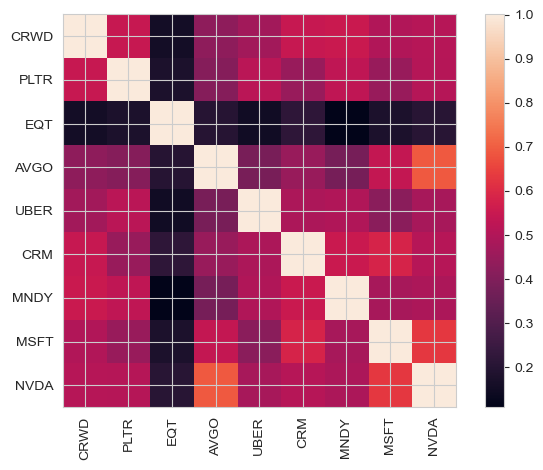

In [63]:
plotting.plot_covariance(S, plot_correlation=True)

Compute the prior estimate of returns implied by the market weights. In other words, given each asset's contribution to the risk of the market     portfolio, how much are we expecting to be compensated? This is the percentage return expected from each asset,

In [64]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

CRWD    0.344370
PLTR    0.420737
EQT     0.125873
AVGO    0.319381
UBER    0.293816
CRM     0.271160
MNDY    0.438176
MSFT    0.263834
NVDA    0.574774
dtype: float64

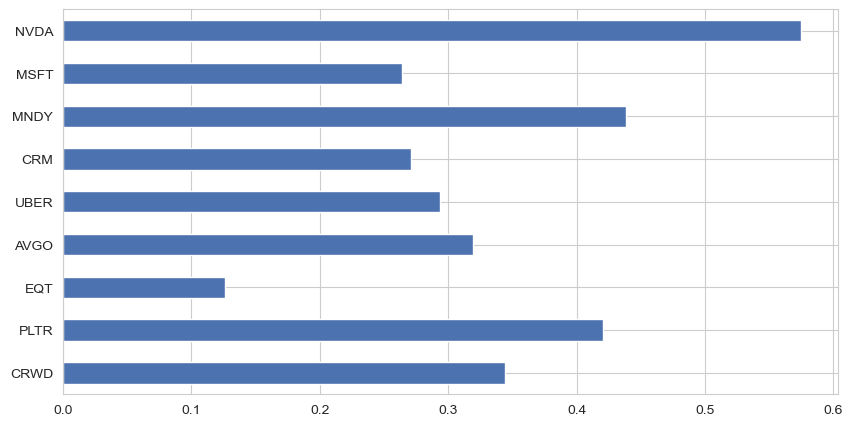

In [65]:
market_prior.plot.barh(figsize=(10,5));

Here you can set your expert point of view. If you estimate some assets will outperform or outerperform, you can express your expected drops or raises in range of [-1, 1]

In [66]:
# You don't have to provide views on all the assets
viewdict = {}

viewdict = {'CRWD': 0.01, 'PLTR': 0.01, 'EQT': 0.01, 'AVGO': 0.01, 'UBER': 0.01, 'CRM': 0.01, 'MNDY': 0.01, 'MSFT': 0.3, 'NVDA': 0.3}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [67]:
ret_bl = bl.bl_returns()
ret_bl

CRWD    0.092542
PLTR    0.104851
EQT     0.036786
AVGO    0.132014
UBER    0.074199
CRM     0.090260
MNDY    0.109570
MSFT    0.196706
NVDA    0.328033
dtype: float64

We can modify the behavior of the model by setting confidence on our point of view about the returns

In [68]:
##{'PYPL', 'CRWD', 'PATH': 0.01, 'PLTR': 0.01, 'ASAN': 0.01, 'EQT': 0.01, 'AVGO': 0.01, 'UBER': 0.01, 'CRM': 0.01, 'MNDY': 0.01, 'MSFT': 0.3, 'NVDA': 0.3}
confidences = [
    0.5, # confident for CRWD
    0.5, # confident for PLTR
    0.5, # confident for EQT
    0.5, # confident for AVGO
    0.5, # confident for UBER
    0.5, # confident for CRM
    0.5, # confident for MNDY
    0.8, # confident for MSFT
    0.8, # confident for NVDA
]

In [69]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

Lets review the certainty matrix produced by our point of view and confidence.

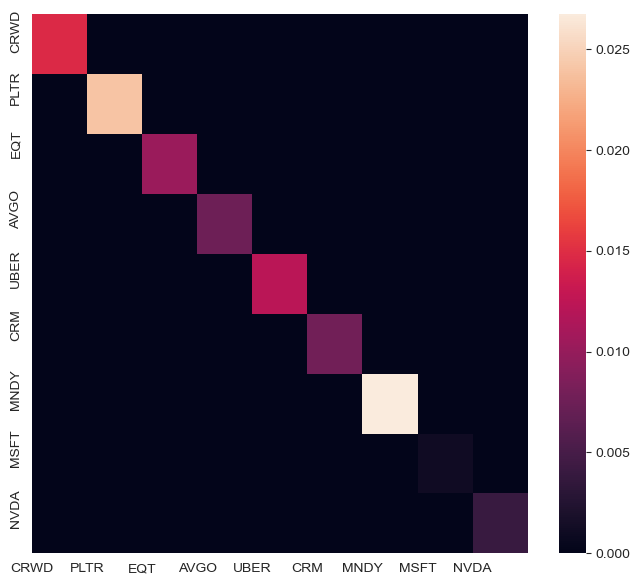

In [70]:
fig, ax = plt.subplots(figsize=(8,7))
im = sns.heatmap(bl.omega, fmt='.2f')

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [71]:
np.diag(bl.omega)

array([0.01462424, 0.02398703, 0.01024193, 0.00746279, 0.01223882,
       0.00774013, 0.0267267 , 0.00104726, 0.00400392])

In [72]:
ret_bl = bl.bl_returns()
ret_bl

CRWD    0.104167
PLTR    0.112979
EQT     0.038747
AVGO    0.138879
UBER    0.078808
CRM     0.106240
MNDY    0.123317
MSFT    0.249588
NVDA    0.328132
dtype: float64

Do we need to set a single value of confidence in our point of views? NO! We can set the interval.

In [73]:
##{'PYPL', 'CRWD', 'PATH': 0.01, 'PLTR': 0.01, 'ASAN': 0.01, 'EQT': 0.01, 'AVGO': 0.01, 'UBER': 0.01, 'CRM': 0.01, 'MNDY': 0.01, 'MSFT': 0.3, 'NVDA': 0.3}
intervals = [
    (0.45, 0.55), # confident for CRWD
    (0.45, 0.55), # confident for PLTR
    (0.45, 0.55), # confident for EQT
    (0.45, 0.55), # confident for AVGO
    (0.45, 0.55), # confident for UBER
    (0.45, 0.55), # confident for CRM
    (0.45, 0.55), # confident for MNDY
    (0.7, 0.9), # confident for MSFT
    (0.7, 0.9) # confident for NVDA
]

In [74]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.010000000000000007, 0.010000000000000007]


In [75]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [76]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

CRWD    0.025076
PLTR    0.022575
EQT     0.013956
AVGO    0.066047
UBER    0.022349
CRM     0.035467
MNDY    0.021689
MSFT    0.137779
NVDA    0.272729
dtype: float64

We can see the prior estimates, the posterior adjusted with the risk provided and the estimates with our point of view

In [77]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
CRWD,0.344370,0.025076,0.01
PLTR,0.420737,0.022575,0.01
EQT,0.125873,0.013956,0.01
AVGO,0.319381,0.066047,0.01
UBER,0.293816,0.022349,0.01
CRM,0.271160,0.035467,0.01
MNDY,0.438176,0.021689,0.01
MSFT,0.263834,0.137779,0.30
NVDA,0.574774,0.272729,0.30


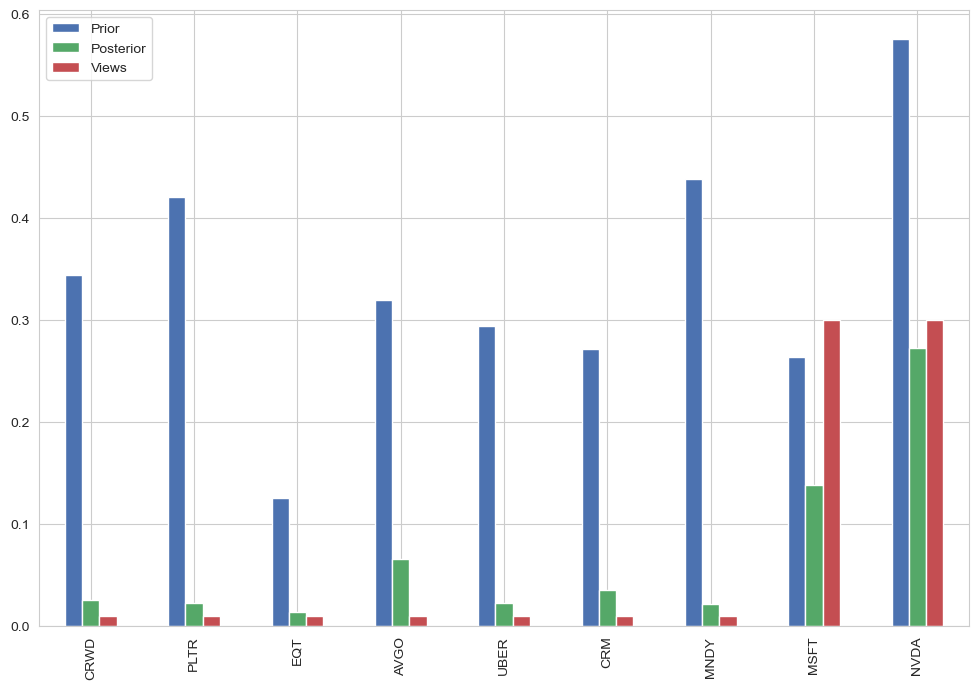

In [78]:
rets_df.plot.bar(figsize=(12,8));

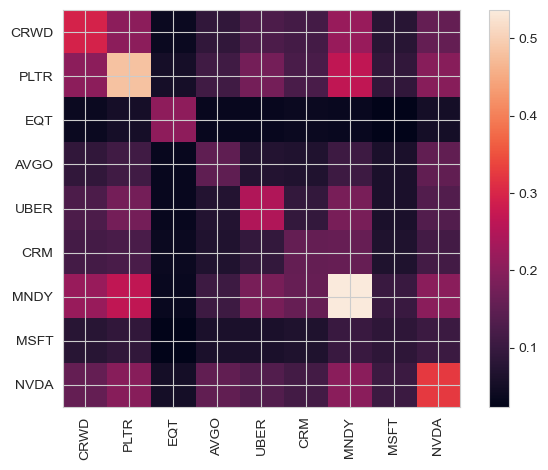

In [79]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

Lets calculate the efficient frontier of stock percentages

In [80]:
from pypfopt import EfficientFrontier, objective_functions

In [81]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

c:\Users\imedi\anaconda3\envs\DataPub202406\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('CRWD', 0.0),
             ('PLTR', 0.0),
             ('EQT', 0.0),
             ('AVGO', 0.03939),
             ('UBER', 0.0),
             ('CRM', 0.0),
             ('MNDY', 0.0),
             ('MSFT', 0.31834),
             ('NVDA', 0.64227)])

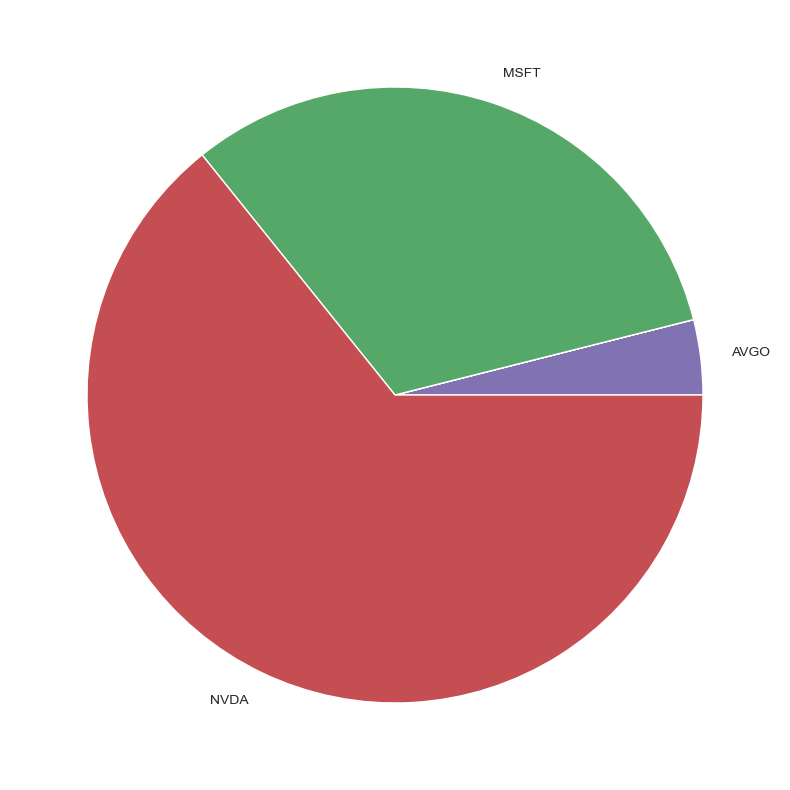

In [82]:
pd.Series(weights).plot.pie(figsize=(10,10));

How many titles should I buy?

In [83]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, stock_prices.iloc[-1], total_portfolio_value=20000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Leftover: $21.27


{'PLTR': 1, 'EQT': 1, 'AVGO': 5, 'MSFT': 15, 'NVDA': 104}

In [84]:
bl.omega

array([[0.0025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.0025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.0025, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.0025, 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.0025, 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.0025, 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0025, 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.01  ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.01  ]])

In [85]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

mean_bl =  market_prices.pct_change().dropna().mean() 
stdev_bl =  market_prices.pct_change().dropna().std()
df_portfolio = weights


# Final report:
print(f'Black-Litterman Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {mean_bl * 100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*mean_bl*52*5:.2f}')
print(f'   -Variance: +/-{stdev_bl * 100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*stdev_bl*52*5:.2f}')
print('   -Portfolio composition:')
for symbol, percentage in sorted(weights.items(), key=lambda t: t[::-1], reverse=True):
    print(f'\tStock: {symbol}. \tPercentage: {percentage*100:.2f}%.\tAmount USD: ${percentage * usd_investment_amount:.2f}.\tAmount MXN: ${percentage * mxn_investment_amount:.2f}.')

Black-Litterman Portfolio (MXN amount: 23000.0. USD amount: 1299.4350282485875):
   -Expected earns (daily): 0.05%.
	Expected amount (Yearly): $155.83
   -Variance: +/-1.18%
	Expected variance amount (Yearly): +/-$3972.31
   -Portfolio composition:
	Stock: NVDA. 	Percentage: 64.23%.	Amount USD: $834.59.	Amount MXN: $14772.21.
	Stock: MSFT. 	Percentage: 31.83%.	Amount USD: $413.66.	Amount MXN: $7321.82.
	Stock: AVGO. 	Percentage: 3.94%.	Amount USD: $51.18.	Amount MXN: $905.97.
	Stock: UBER. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: PLTR. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: MNDY. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: EQT. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: CRWD. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: CRM. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.


## Conclusiones
Que mejor que un modelo de optimización de portafolios que 3 modelos. Ambos asumen propiedades de la distribución de los datos que no se cumplen pero que pueden ser una buena aproximación al modelo real de los datos. ¿Quieres jugar con las salidas de los modelos?, Adelante!, prueba diferentes listas de stocks e itera hasta tener tu portafolio ideal, el riesgo se reduce (en cierta forma, pero no se elimina) mientras que los retornos mejoran (pero yo no apostaría a que esto ocurre en el 100% de casos). 

# Referencias
* Kanungo, D. K. (2023). *Probabilistic Machine Learning for Finance and Investment: A Primer to Generative AI with Python*. O'Reilly. p. 339.
* Raposa (2022). *How to use Python and the Kelly Criterion to Optimize your Stock Portfolio*. Disponible en [https://raposa.trade/blog/how-to-use-python-and-the-kelly-criterion-to-optimize-your-stock-portfolio/]. Consultado el 20 de junio de 2024.